In [1]:
import copy
from matplotlib import pyplot as plt
import numpy as np
import os
from glob import glob

from numpy import savetxt
import math
import re
import glob

In [2]:
def LoadData(est1, est2, gt,align):
    paths=[est1,est2,gt]
    concatinated=[]
    #gt = np.array(np.loadtxt(gt))
    #print(gt)
    
    for path in paths:
        #print("load: "+path)
        est3 = np.loadtxt(path)
        est_np=np.array(est3)
        R = np.transpose([ [est_np[0,0],est_np[0,1]],[est_np[0,4],est_np[0,5]]])
        t =[ [est_np[0,3]],[ est_np[0,7] ] ]
        x=np.array(est3[:,3])
        y=np.array(est3[:,7])
        p=np.array([x,y])
        #print("before align")
        #print(p[0,:])
        p=R@(p-t)
        #print("after align")
        #print(p[0,:])
        concatinated.append(np.transpose(p))
        #print(concatinated)
    #concatinated[2]=np.transpose(R@np.transpose(concatinated[2]))
        #print(p)
    #concatinated[2]=np.transpose(R*np.transpose(concatinated[2]))
    return concatinated[0], concatinated[1], concatinated[2]
        
    
def plot_trajectory(poses_result,poses_result2,poses_gt, title, dataset):
        fontsize_ = 20
        # For others
        
        #print("plot mulran")
        
        if dataset=="oxford":
            fig = plt.figure()
            ax = plt.gca()
            ax.set_aspect('equal')
            plt.plot(poses_gt[:, 0],  -1*poses_gt[:, 1],"--", color="orange", label="Ground truth")
            plt.plot( poses_gt[0,0], poses_gt[0,1], "x",color="orange",markersize=12,markeredgewidth=2,fillstyle='none')
            plt.plot( poses_gt[-1,0], poses_gt[-1,1], "s",color="orange",markersize=12,markeredgewidth=2,fillstyle='none')

            plt.plot(poses_result[:, 0],  -1*poses_result[:, 1],"b", label="CFEAR-3")
            plt.plot( poses_result[-1,0], -1*poses_result[-1,1], "bs", markersize=12,markeredgewidth=2,fillstyle='none')

            plt.plot(poses_result2[:, 0],  -1*poses_result2[:, 1],"g", label="CFEAR-3-s50")
            plt.plot(poses_result2[-1,0],  -1*poses_result2[-1,1], "gs", markersize=12,markeredgewidth=2,fillstyle='none')
            #plt.title(title, loc='left') 

            plt.legend( loc='lower left', prop={'size': fontsize_}) #
            plt.xticks(fontsize=fontsize_)
            plt.xticks(rotation=45)
            plt.yticks(fontsize=fontsize_)
            plt.xlabel('x (m)', fontsize=fontsize_)
            plt.ylabel('y (m)', fontsize=fontsize_)
            fig.set_size_inches(10, 10)
               
            fig_pdf = "./output/"+title+".pdf"
            plt.savefig(fig_pdf, bbox_inches='tight', pad_inches=0)
            plt.show()
        elif dataset=="MulRan":
            fig = plt.figure()
            ax = plt.gca()
            ax.set_aspect('equal')
            
            #poses_gt=poses_gt-
            
            #print(poses_gt)
   
            plt.plot(poses_gt[:, 0],  1*poses_gt[:, 1],"--", color="orange", label="Ground truth")
            plt.plot( poses_gt[0,0], 1*poses_gt[0,1],"x",color="orange",markersize=12,markeredgewidth=2,fillstyle='none')
            plt.plot( poses_gt[-1,0], 1*poses_gt[-1,1],"s",color="orange",markersize=12,markeredgewidth=2,fillstyle='none')

            plt.plot(poses_result[:, 0],  1*poses_result[:, 1],"b", label="CFEAR-3")
            plt.plot( poses_result[-1,0], 1*poses_result[-1,1], "bs", markersize=12,markeredgewidth=2,fillstyle='none')

            plt.plot(poses_result2[:, 0],  1*poses_result2[:, 1],"g", label="CFEAR-3-s50")
            plt.plot(poses_result2[-1,0],  1*poses_result2[-1,1], "gs", markersize=12,markeredgewidth=2,fillstyle='none')
            #plt.title(title, loc='left')
            
            plt.legend( loc='lower left', prop={'size': fontsize_}) #
            plt.xticks(fontsize=fontsize_)
            plt.xticks(rotation=45)
            plt.yticks(fontsize=fontsize_)
            plt.xlabel('x (m)', fontsize=fontsize_)
            plt.ylabel('y (m)', fontsize=fontsize_)
            fig.set_size_inches(10, 10)
            fig_pdf = "./output/"+title+".pdf"
            plt.savefig(fig_pdf, bbox_inches='tight', pad_inches=0)
            plt.show()
            
            fig = plt.figure()
            ax = plt.gca()
            ax.set_aspect('equal')
             #poses_gt=poses_gt-
            
            poses_gt=np.transpose([[0,-1],[1,0]]@np.transpose(poses_gt))
            poses_result=np.transpose([[0,-1],[1,0]]@np.transpose(poses_result))
            poses_result2=np.transpose([[0,-1],[1,0]]@np.transpose(poses_result2))
            #poses_result=np.array([[0,-1],[1,0]])@poses_result
            #poses_result2=np.array([[0,-1],[1,0]])@poses_result2
            plt.plot(poses_gt[:, 0],  1*poses_gt[:,1],"--", color="orange", label="Ground truth")
            plt.plot( poses_gt[0,0],  1*poses_gt[0,1],"x", color="orange",markersize=12,markeredgewidth=2,fillstyle='none')
            plt.plot( poses_gt[-1,0], 1*poses_gt[-1,1], "s",color="orange",markersize=12,markeredgewidth=2,fillstyle='none')

            plt.plot(poses_result[:, 0],  1*poses_result[:, 1],color="blue", label="CFEAR-3")
            plt.plot( poses_result[-1,0], 1*poses_result[-1,1], "s",color="blue", markersize=12,markeredgewidth=2,fillstyle='none')

            plt.plot(poses_result2[:,0],  1*poses_result2[:,1],"g", label="CFEAR-3-s50")
            plt.plot(poses_result2[-1,0],  1*poses_result2[-1,1], "gs", markersize=12,markeredgewidth=2,fillstyle='none')
            #plt.title(title, loc='left')
            # Uomment for riverside 01/02
            plt.xlim((-210, 400)) 
            plt.legend( loc='upper left', prop={'size': 0.8*fontsize_}) #
            
            #Uncomment for Riverside03
            #plt.xlim((-400, 220)) #For riverside 01/02
            #plt.legend( loc='lower left', prop={'size': 0.8*fontsize_}) #
            
            plt.xticks(fontsize=fontsize_)
            plt.xticks(rotation=45)
            plt.yticks(fontsize=fontsize_)
            plt.xlabel('x (m)', fontsize=fontsize_)
            plt.ylabel('y (m)', fontsize=fontsize_)
            fig.set_size_inches(10, 10)
            fig_pdf = "./output/"+title+"_flip.pdf"
            plt.savefig(fig_pdf, bbox_inches='tight', pad_inches=0)
            plt.show()
            
            
        
        

        
     
        #plt.close(fig)

1


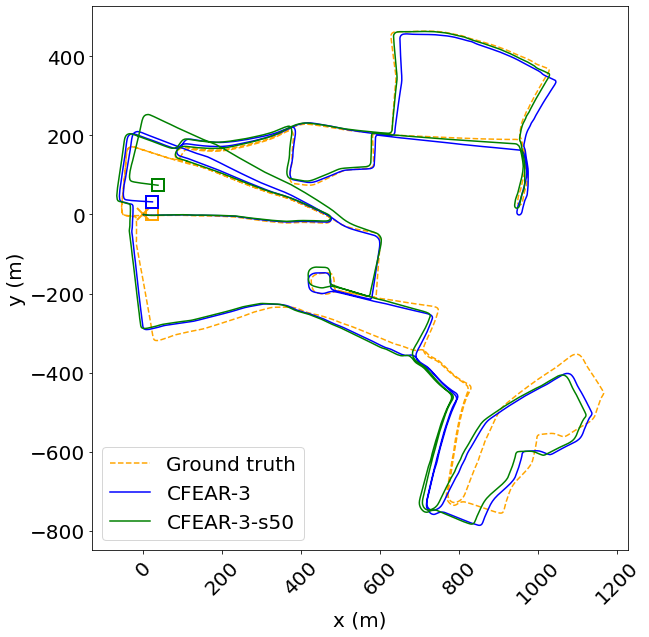

2


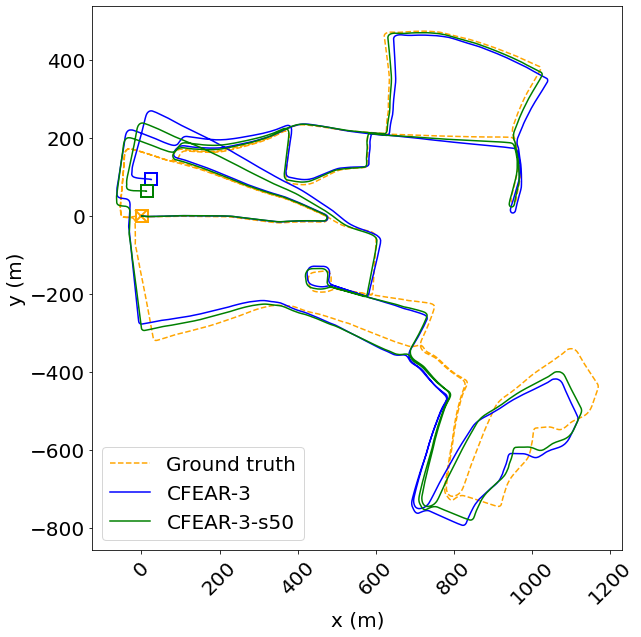

3


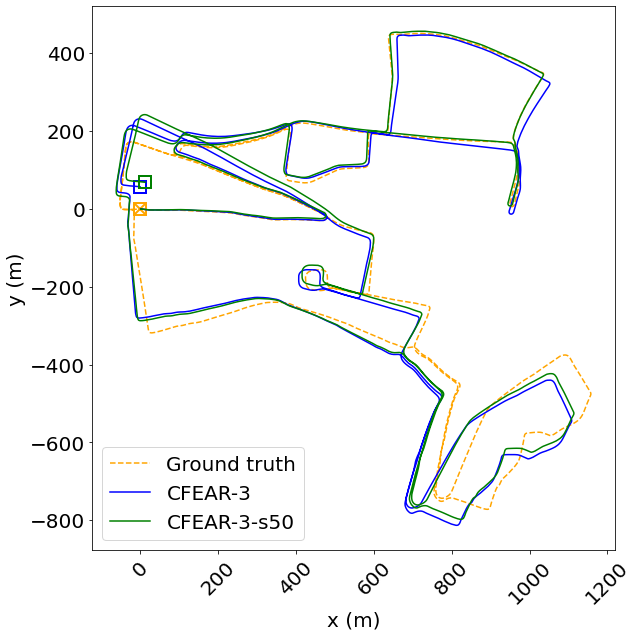

4


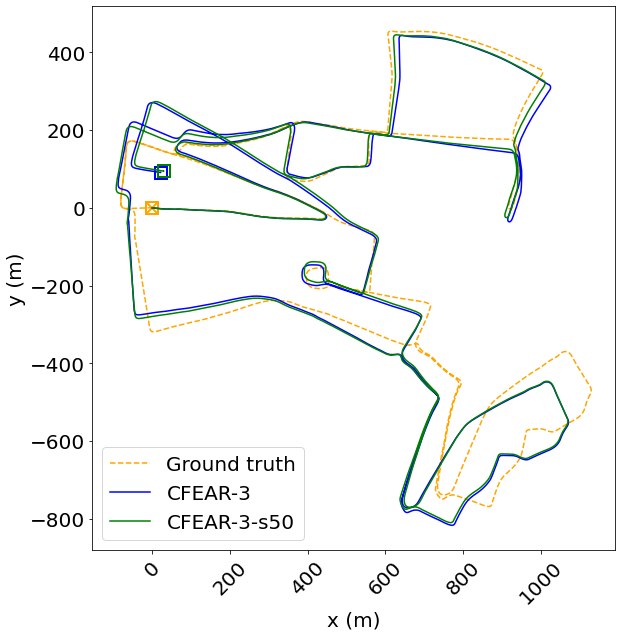

5


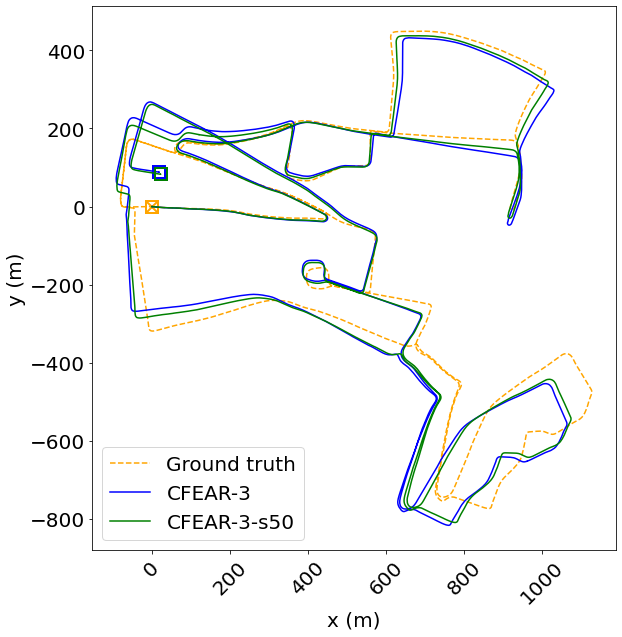

6


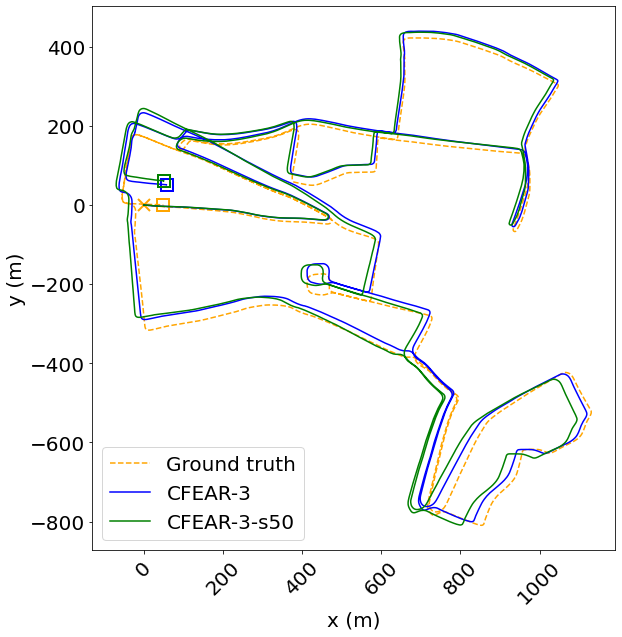

7


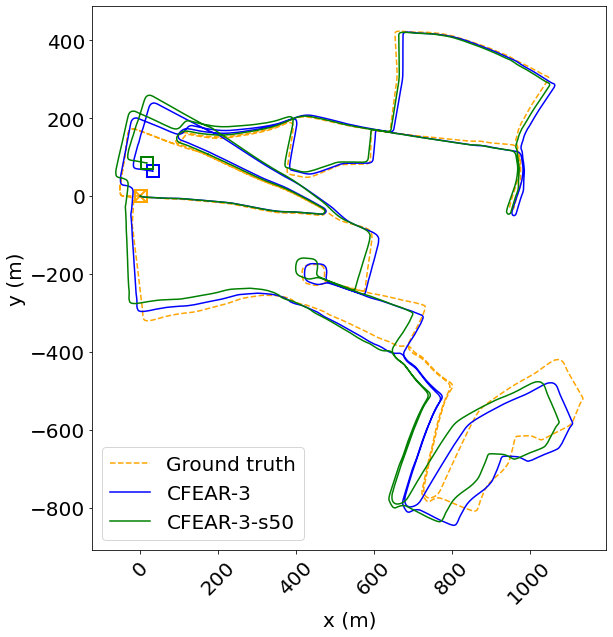

8


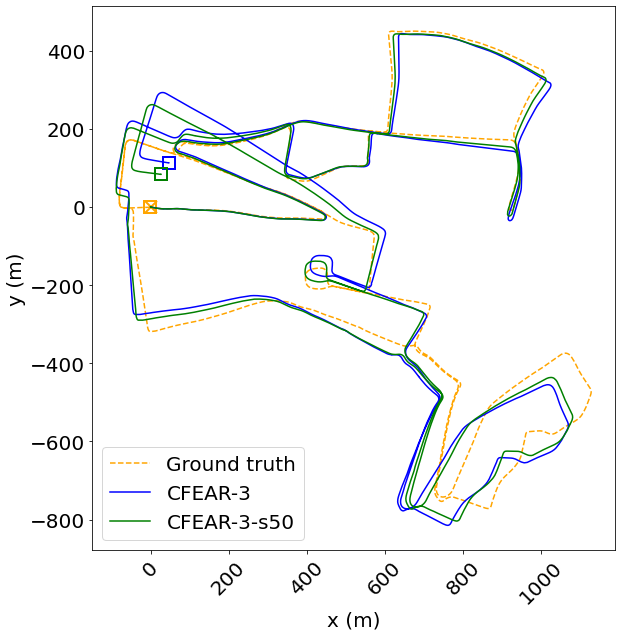

In [3]:
######### OXFORD
sequences=["10-12-32", "16-13-09","17-13-26", "18-14-14", "18-15-20", "16-11-53", "10-11-46", "18-14-46"]
dir_cfear3='./data/oxford_baseline-cfear-3_2022-04-28_1708/'
dir_cfear3s50='./data/oxford_baseline-cfear-3-s50_2022-04-28_1804/'
for job in range(1,9):
    print(job)
    est1_base=dir_cfear3+"job_"+str(job)+"/est/??.txt"
    est2_base=dir_cfear3s50+"job_"+str(job)+"/est/??.txt"
    gt_base=dir_cfear3s50+"job_"+str(job)+"/gt/??.txt"
    est1_path=glob.glob(est1_base)
    est2_path=glob.glob(est2_base)
    gt_path=glob.glob(gt_base)
    est,est2,gt=LoadData(est1_path[0],est2_path[0],gt_path[0],False)
    plot_trajectory(est,est2,gt,sequences[job-1],"oxford")
    
    #print(est2)
    

job:1


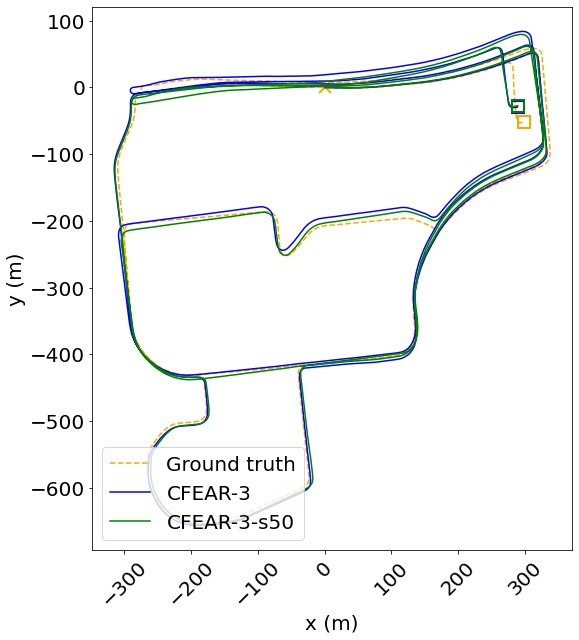

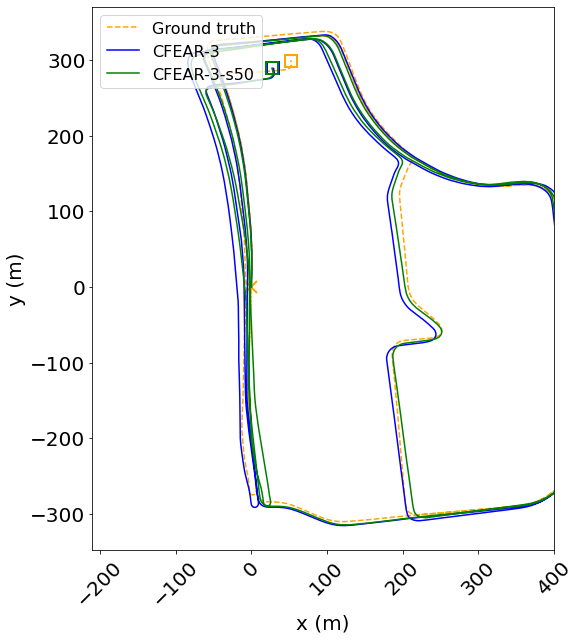

job:2


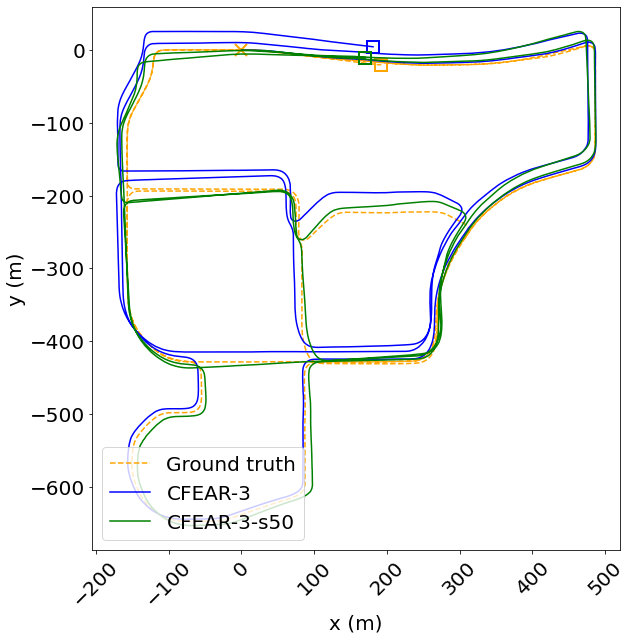

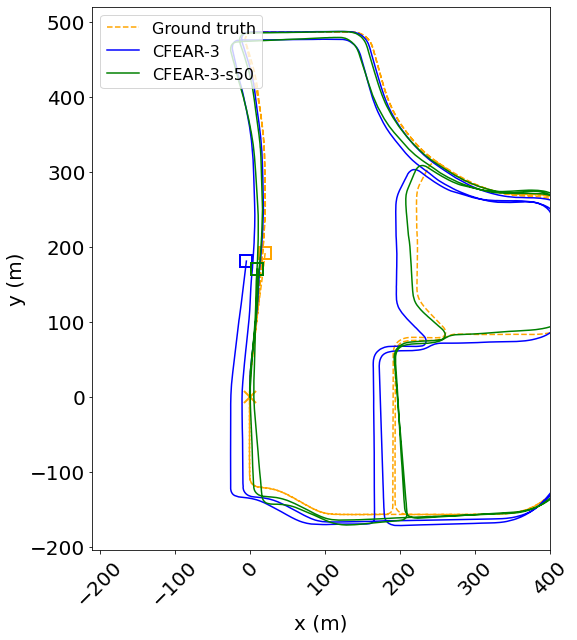

job:3


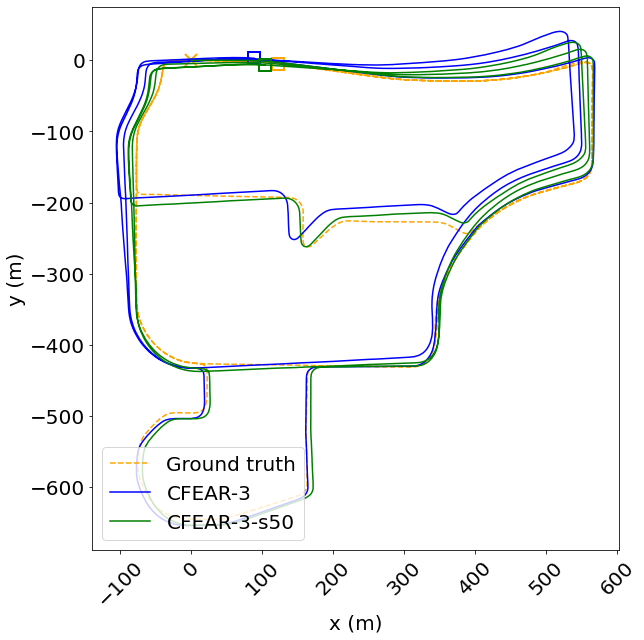

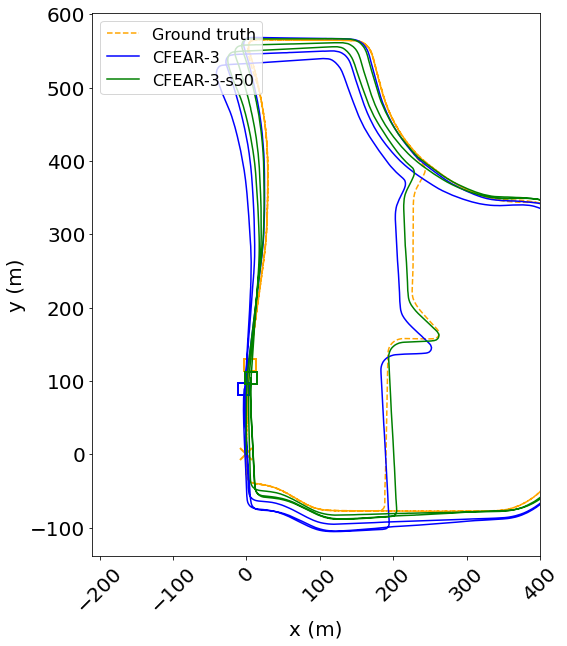

job:4


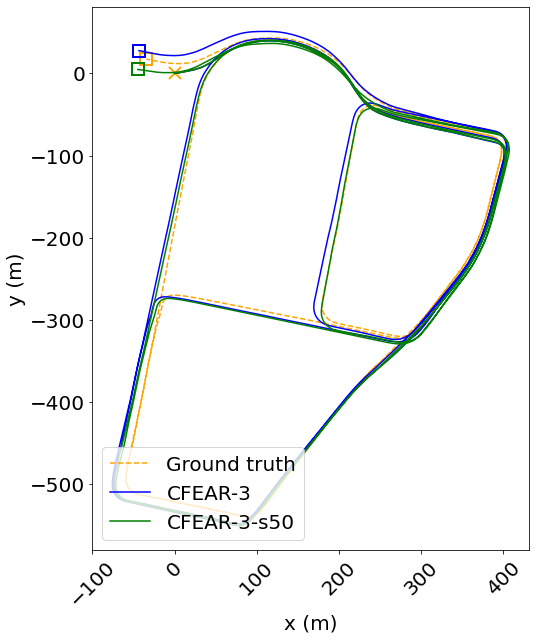

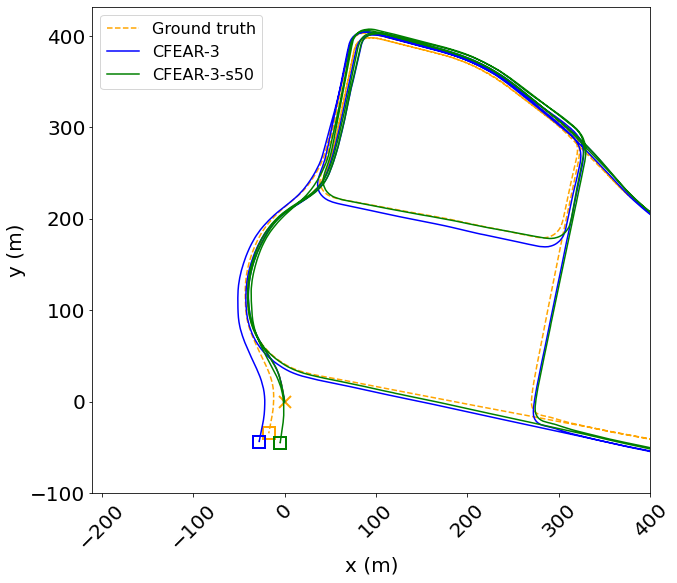

job:5


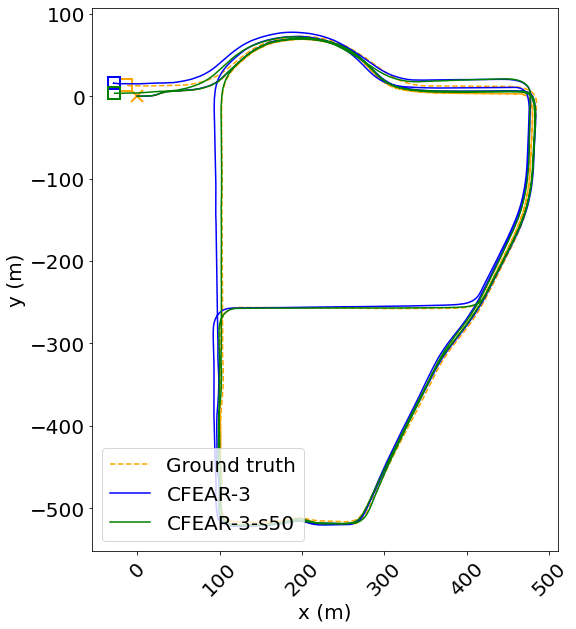

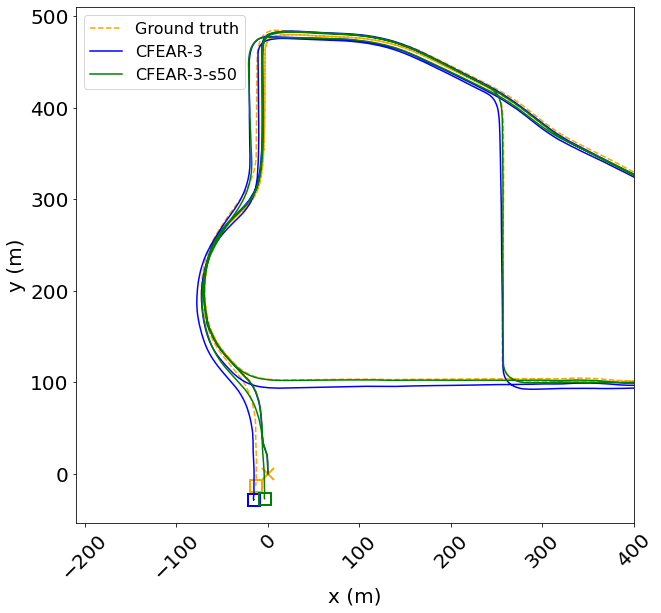

job:6


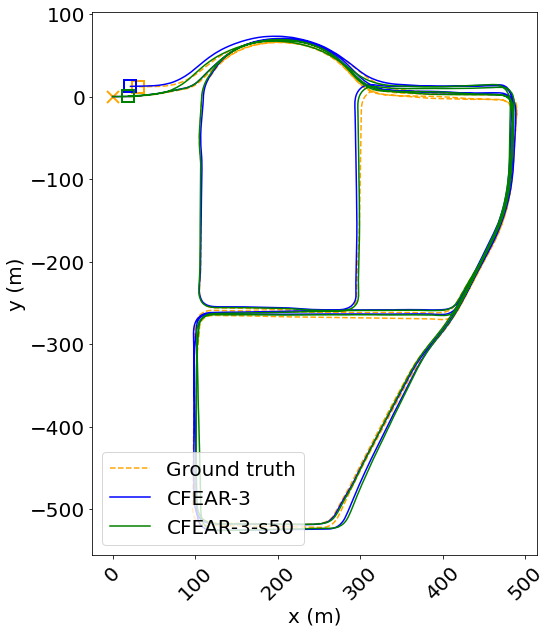

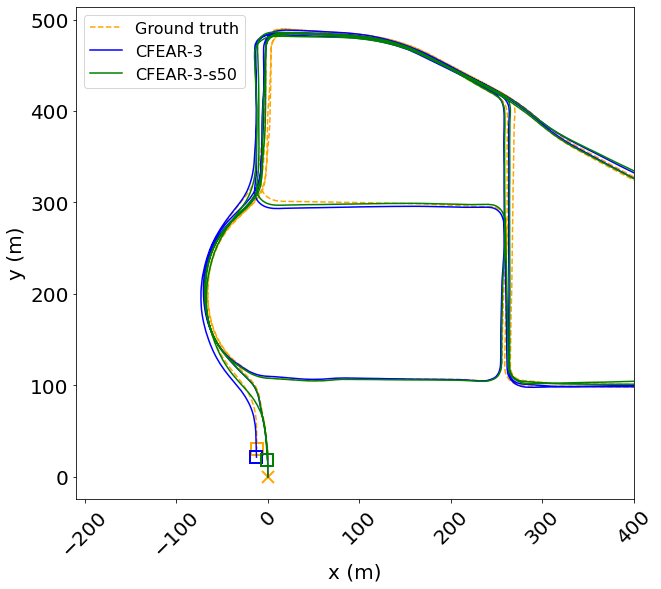

job:7


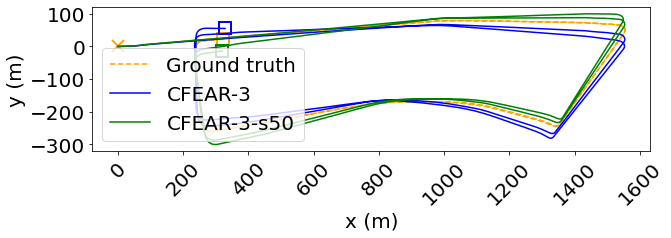

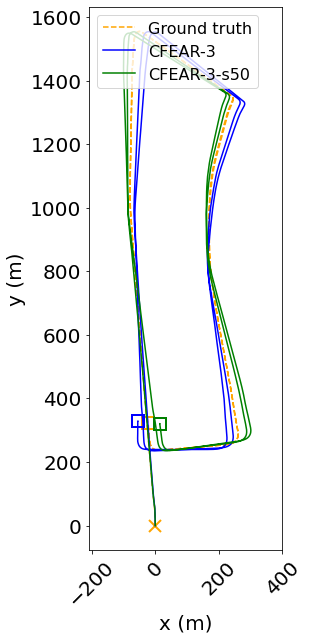

job:8


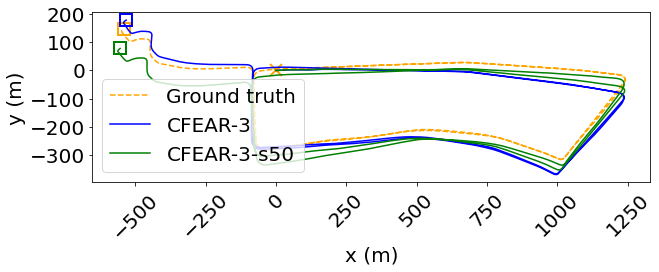

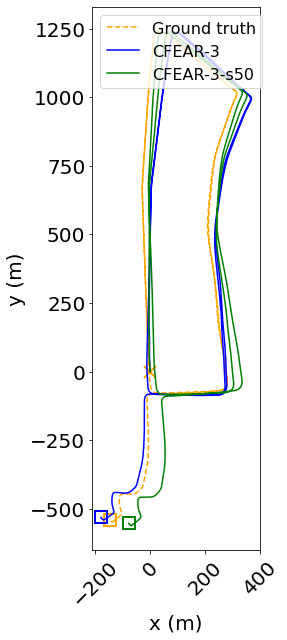

job:9


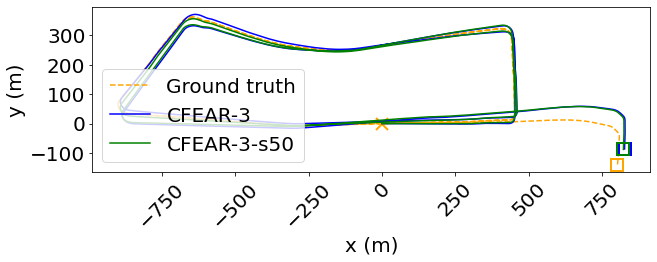

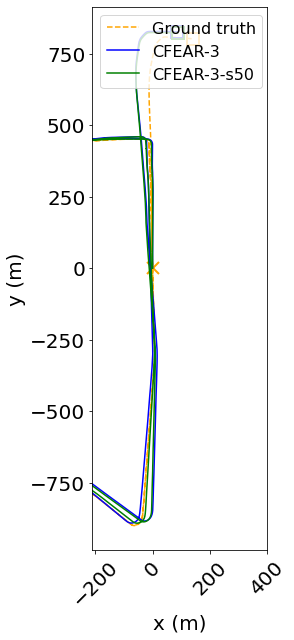

In [4]:
sequences=["KAIST01", "KAIST02", "KAIST03", "DCC01", "DCC02", "DCC03", "Riverside01", "Riverside02", "Riverside03"]
dir_cfear3='./data/mulran_baseline-cfear-3_2022-04-28_1857/'
dir_cfear3s50='./data/mulran_baseline-cfear-3-s50_2022-04-28_1940/'
for job in range(1,10):
    print("job:"+str(job))
    est1_base=dir_cfear3+"job_"+str(job)+"/est/??.txt"
    est2_base=dir_cfear3s50+"job_"+str(job)+"/est/??.txt"
    gt_base=dir_cfear3s50+"job_"+str(job)+"/gt/??.txt"
    
    est1_path=glob.glob(est1_base)
    est2_path=glob.glob(est2_base)
    gt_path=glob.glob(gt_base)
    est,est2,gt=LoadData(est1_path[0],est2_path[0],gt_path[0],True)
    plot_trajectory(est,est2,gt,sequences[job-1],"MulRan")
    